# US Car Trends
This is the BIOS 512 final project for Valen Zhang.

In this Project, I'm going to discover the change in trends of cars in the US. The data is from the US car models data set: https://github.com/abhionlyone/us-car-models-data. This is sorted by year, so I picked three different years, 2022, 2012, and 2002 to see the trend in car production over a 20 year period. 

Link for the raw data is attached here:

1. https://raw.githubusercontent.com/abhionlyone/us-car-models-data/master/2022.csv
2. https://raw.githubusercontent.com/abhionlyone/us-car-models-data/master/2012.csv
3. https://raw.githubusercontent.com/abhionlyone/us-car-models-data/master/2002.csv

## 2 Paragraph Summarize

***Figure 1: Number of Models each Car manufacturer make***

Back in 2002, most companies only produce a small number of models, and only a few big brands are providing a variety of Model choices. As time progresses, more options are being offered. Manufacturers that historically don't make as many models are either announcing new lines, or bringing old ones back. One of the best example is Mercedes-Benz, which jumped from under 10 models in 2002 to over 40 models in twenty years. Even with the introduction of EVs, this is still very impressive. The mean model each Manufactuer offers also just made it pass 10. 

***Figure 2&3: Number of Models for Each Body Style and SUV/Pickup Truck Analysis***

Looking at the distribution of each bodystyle, we cans see a sharp increase of SUVs compare to other body types; meanwhile pickup trucks and coupes are relatively stable. Therefore, I decided to take a look at the SUVs and compare it with the pickup trucks. I choose year 2022, 2012, and 2002 because twenty years can show some great changes. We can see nearly all the car manufacturers nowadays are adding their SUV lines, while those that don't offer SUV models are not even producing any vehicles in 2022. Look at Alfa Romeo, which came to the US in 2017, has already offered a brand new SUV line! This is one of the best example showing how profitable SUVs are. Compared to the flourishing SUVs, pickup truck data stayed the same: Dominated by Dodge, Rams, GMC, Chevy, Ford, Nissan, and Toyota. The Dodge data disappeared because the pickup truck got rebranded to Rams. This might also be the reason why pickup trucks has a better resale value compared to SUVs - There are always new SUVs being introduced, but the pickup truck options are still the way they were 20 years ago. Hopefully this will be challenged with the introduction of Rivian and Tesla.



## Code and Figures

In [4]:
library('tidyverse')
library('ggplot2')
library('dplyr')
library('ggrepel')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”


In [5]:
Car2022 = read_csv('https://raw.githubusercontent.com/abhionlyone/us-car-models-data/master/2022.csv')
Car2012 = read_csv('https://raw.githubusercontent.com/abhionlyone/us-car-models-data/master/2012.csv')
Car2002 = read_csv('https://raw.githubusercontent.com/abhionlyone/us-car-models-data/master/2002.csv')

Rows: 477 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): make, model, body_styles
dbl (1): year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 345 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): make, model, body_styles
dbl (1): year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 309 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): make, model, body_styles
dbl (1): year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Car2022, Car2012, and Car2002 Dataset

In [35]:
Car2022 |> head()
Car2012 |> head()
Car2002 |> head()

Car2022 |> summarise()

year,make,model,body_styles,make_freq,style_freq
<dbl>,<fct>,<chr>,<fct>,<int>,<int>
2022,Mercedes-Benz,A-Class,"[""Sedan""]",43,477
2022,Mercedes-Benz,C-Class,Other,43,477
2022,Mercedes-Benz,CLA,"[""Sedan""]",43,477
2022,Mercedes-Benz,CLS,"[""Sedan""]",43,477
2022,Mercedes-Benz,E-Class,Other,43,477
2022,Mercedes-Benz,G-Class,"[""SUV""]",43,477


year,make,model,body_styles,make_freq
<dbl>,<fct>,<chr>,<chr>,<int>
2012,Chevrolet,Avalanche,"[""SUV""]",32
2012,Chevrolet,Camaro,"[""Coupe"", ""Convertible""]",32
2012,Chevrolet,Captiva Sport,"[""SUV""]",32
2012,Chevrolet,Colorado Crew Cab,"[""Pickup""]",32
2012,Chevrolet,Colorado Extended Cab,"[""Pickup""]",32
2012,Chevrolet,Colorado Regular Cab,"[""Pickup""]",32


year,make,model,body_styles
<dbl>,<chr>,<chr>,<chr>
2002,Acura,CL,"[""Coupe""]"
2002,Acura,MDX,"[""SUV""]"
2002,Acura,NSX,"[""Coupe""]"
2002,Acura,RL,"[""Sedan""]"
2002,Acura,RSX,"[""Coupe""]"
2002,Acura,TL,"[""Sedan""]"


1

### Number of Models each Car manufacturer make (2022, 2012, 2002)

In [36]:
mean2022 <- (nrow(Car2022)/length(unique(unlist(Car2022[c("make")]))))
mean2012 <- (nrow(Car2012)/length(unique(unlist(Car2012[c("make")]))))
mean2002 <- (nrow(Car2002)/length(unique(unlist(Car2002[c("make")]))))


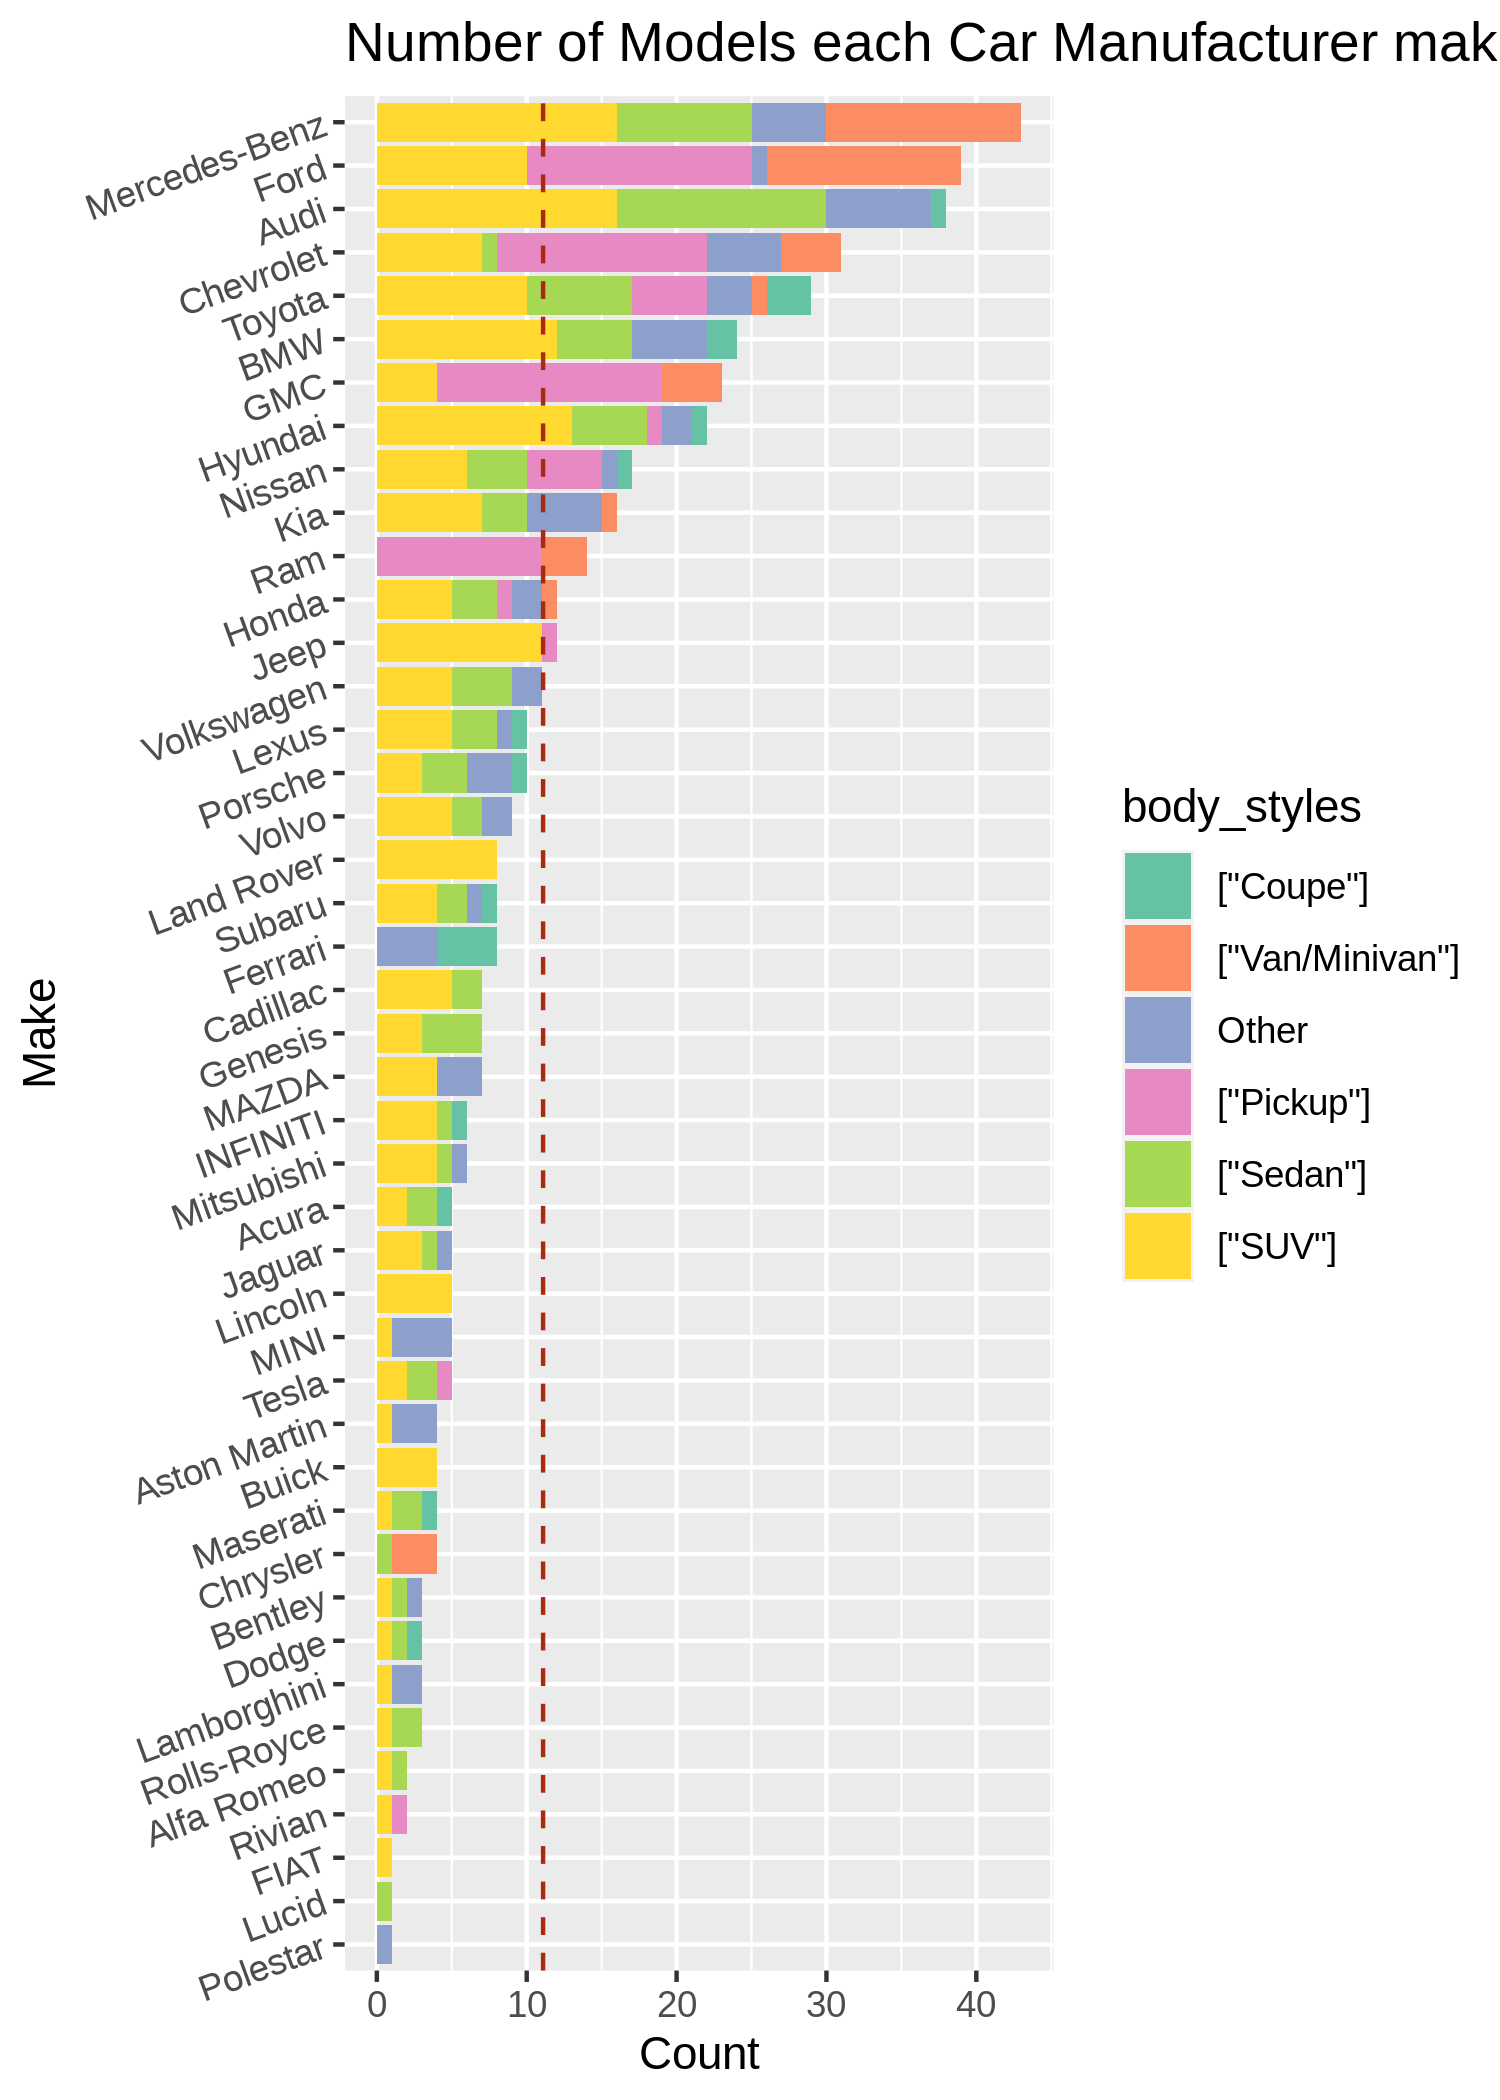

In [44]:
options(repr.plot.width=5, repr.plot.height=7)

Car2022 = Car2022 |> 
    group_by(body_styles) |>
    mutate(style_freq = n()) |>
    ungroup() |>
    arrange(desc(style_freq)) |>
    mutate(body_styles = body_styles |> fct_lump(n = 5) |> fct_inorder() |> fct_rev())

Car2022 = Car2022 |> 
    group_by(make) |>
    mutate(make_freq = n()) |>
    ungroup() |>
    arrange(desc(make_freq)) |>
    mutate(make = make |> fct_inorder() |> fct_rev())

p = ggplot(Car2022, aes(y = make, fill = body_styles)) + 
    labs(x = 'Count', y = 'Make') + 
    geom_bar() +
    geom_vline(xintercept = mean2022, color = '#a82b11', linetype = "dashed") +
    ggtitle("Number of Models each Car Manufacturer make in 2022") + 
    scale_fill_brewer(palette = "Set2") +
    theme(axis.text.y = element_text(angle = 20, hjust = 1)) 
p
    




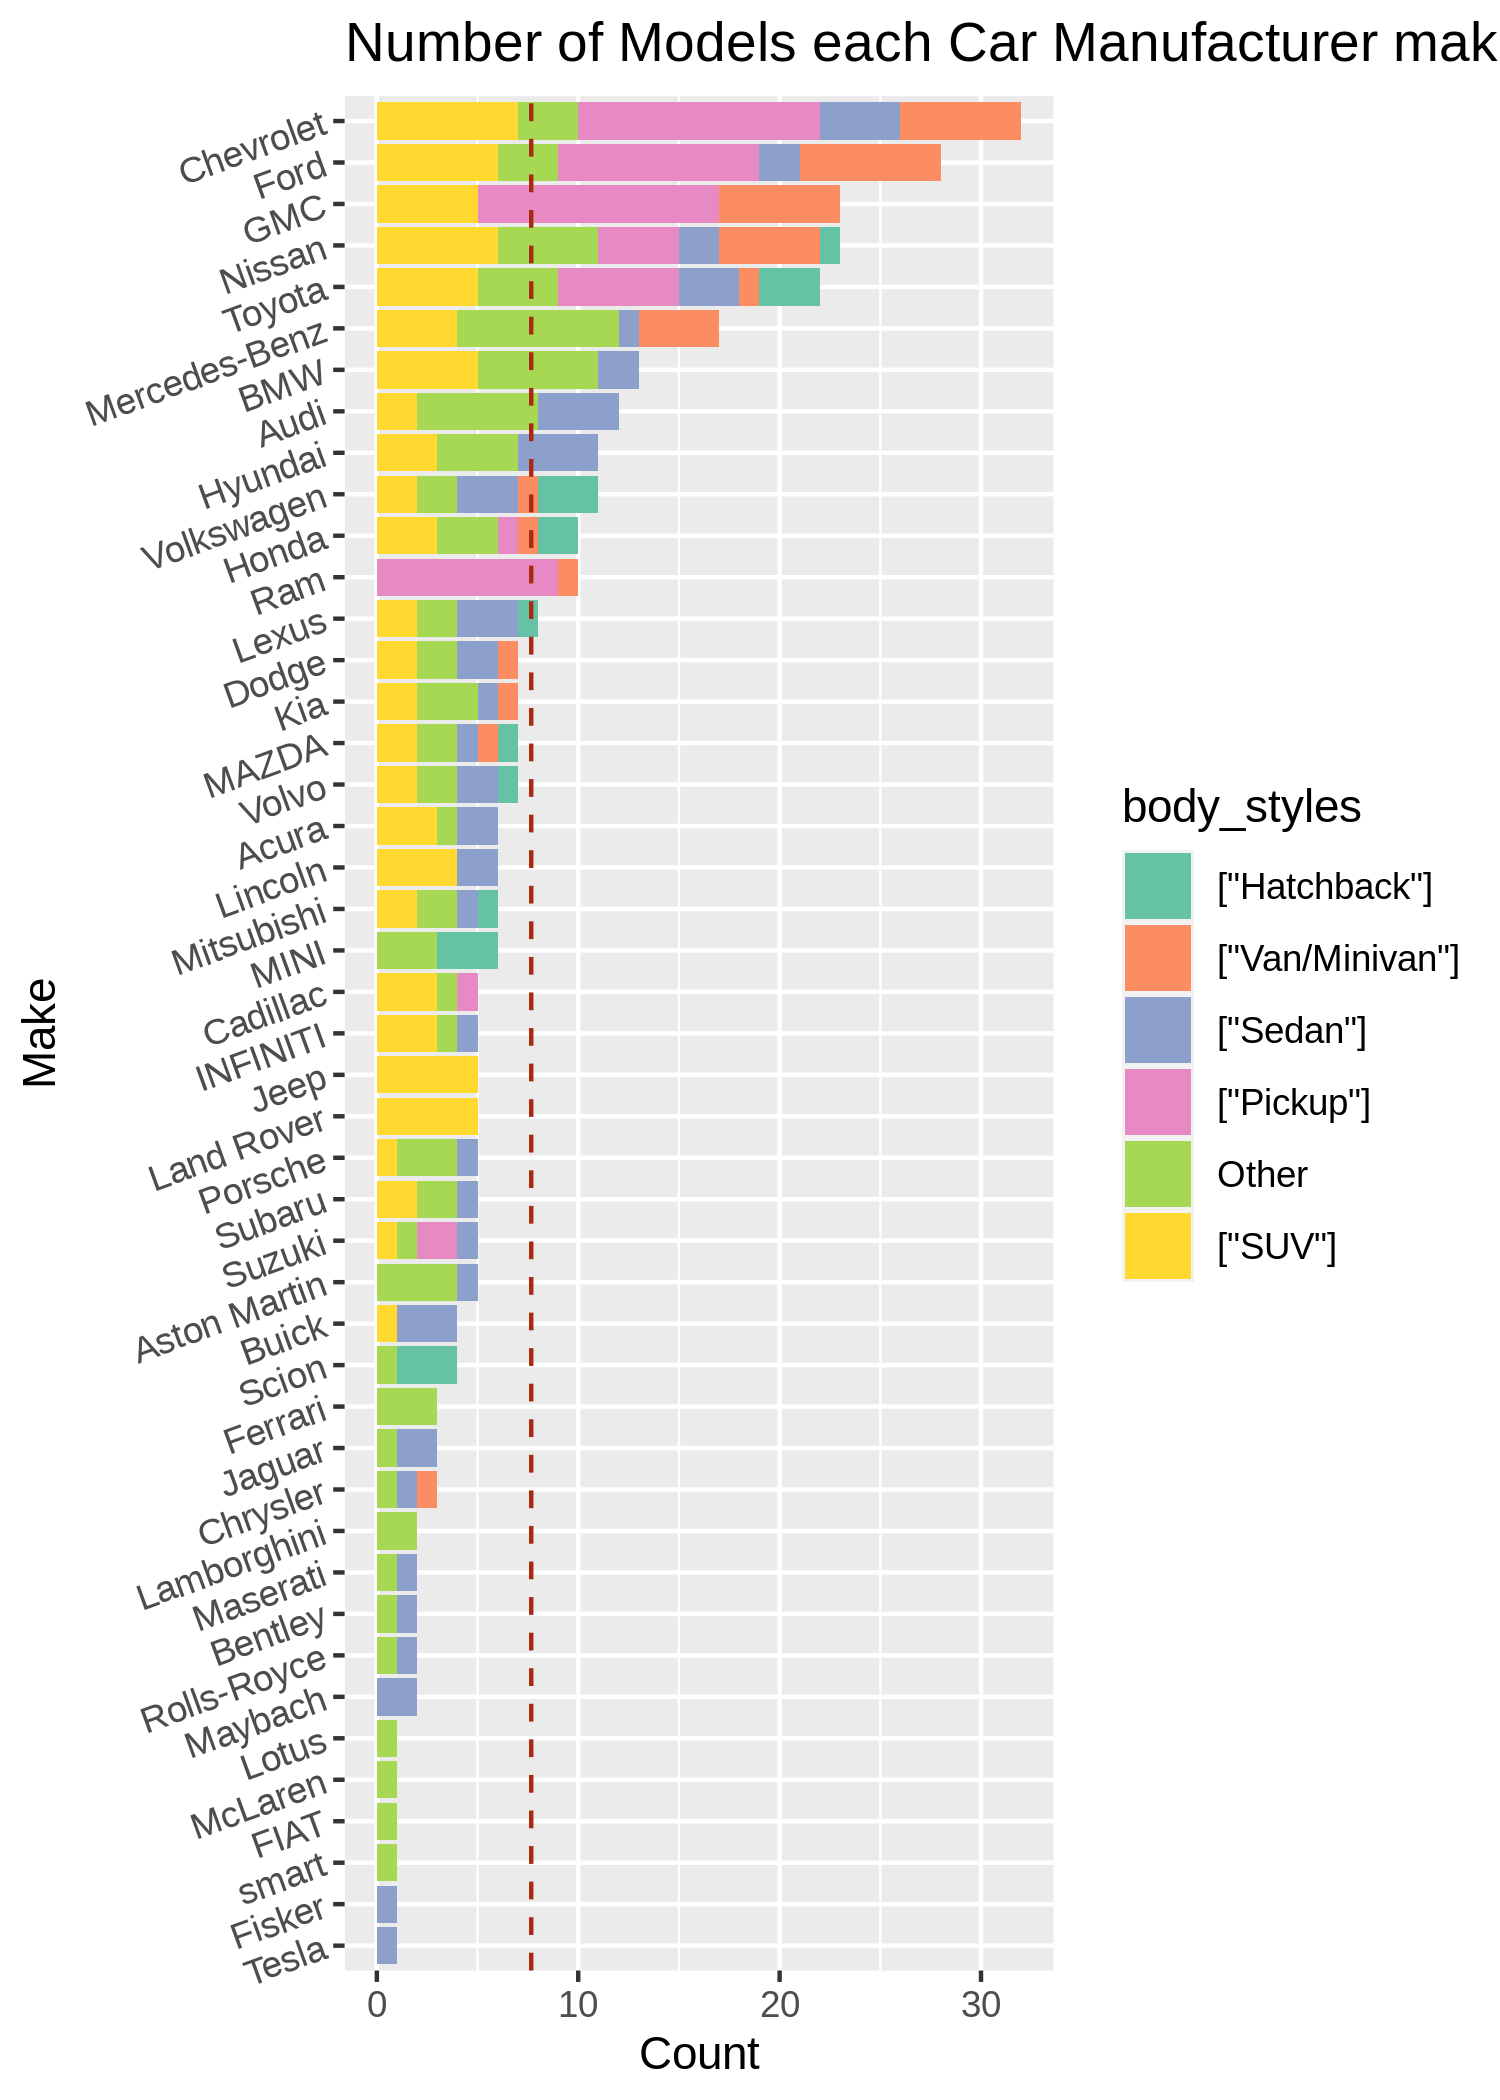

In [43]:
options(repr.plot.width=5, repr.plot.height=7)

Car2012 = Car2012 |> 
    group_by(body_styles) |>
    mutate(style_freq = n()) |>
    ungroup() |>
    arrange(desc(style_freq)) |>
    mutate(body_styles = body_styles |> fct_lump(n = 5) |> fct_inorder() |> fct_rev())

Car2012 = Car2012 |> 
    group_by(make) |>
    mutate(make_freq = n()) |>
    ungroup() |>
    arrange(desc(make_freq)) |>
    mutate(make = make |> fct_inorder() |> fct_rev())


p = ggplot(Car2012, aes(y = make, fill = body_styles)) + 
    labs(x = 'Count', y = 'Make') + 
    geom_bar() +
    geom_vline(xintercept = mean2012, color = '#a82b11', linetype = "dashed") +
    theme(axis.text.y = element_text(angle = 20, hjust = 1)) +
    scale_fill_brewer(palette = "Set2") +
    ggtitle("Number of Models each Car Manufacturer make in 2012")
p





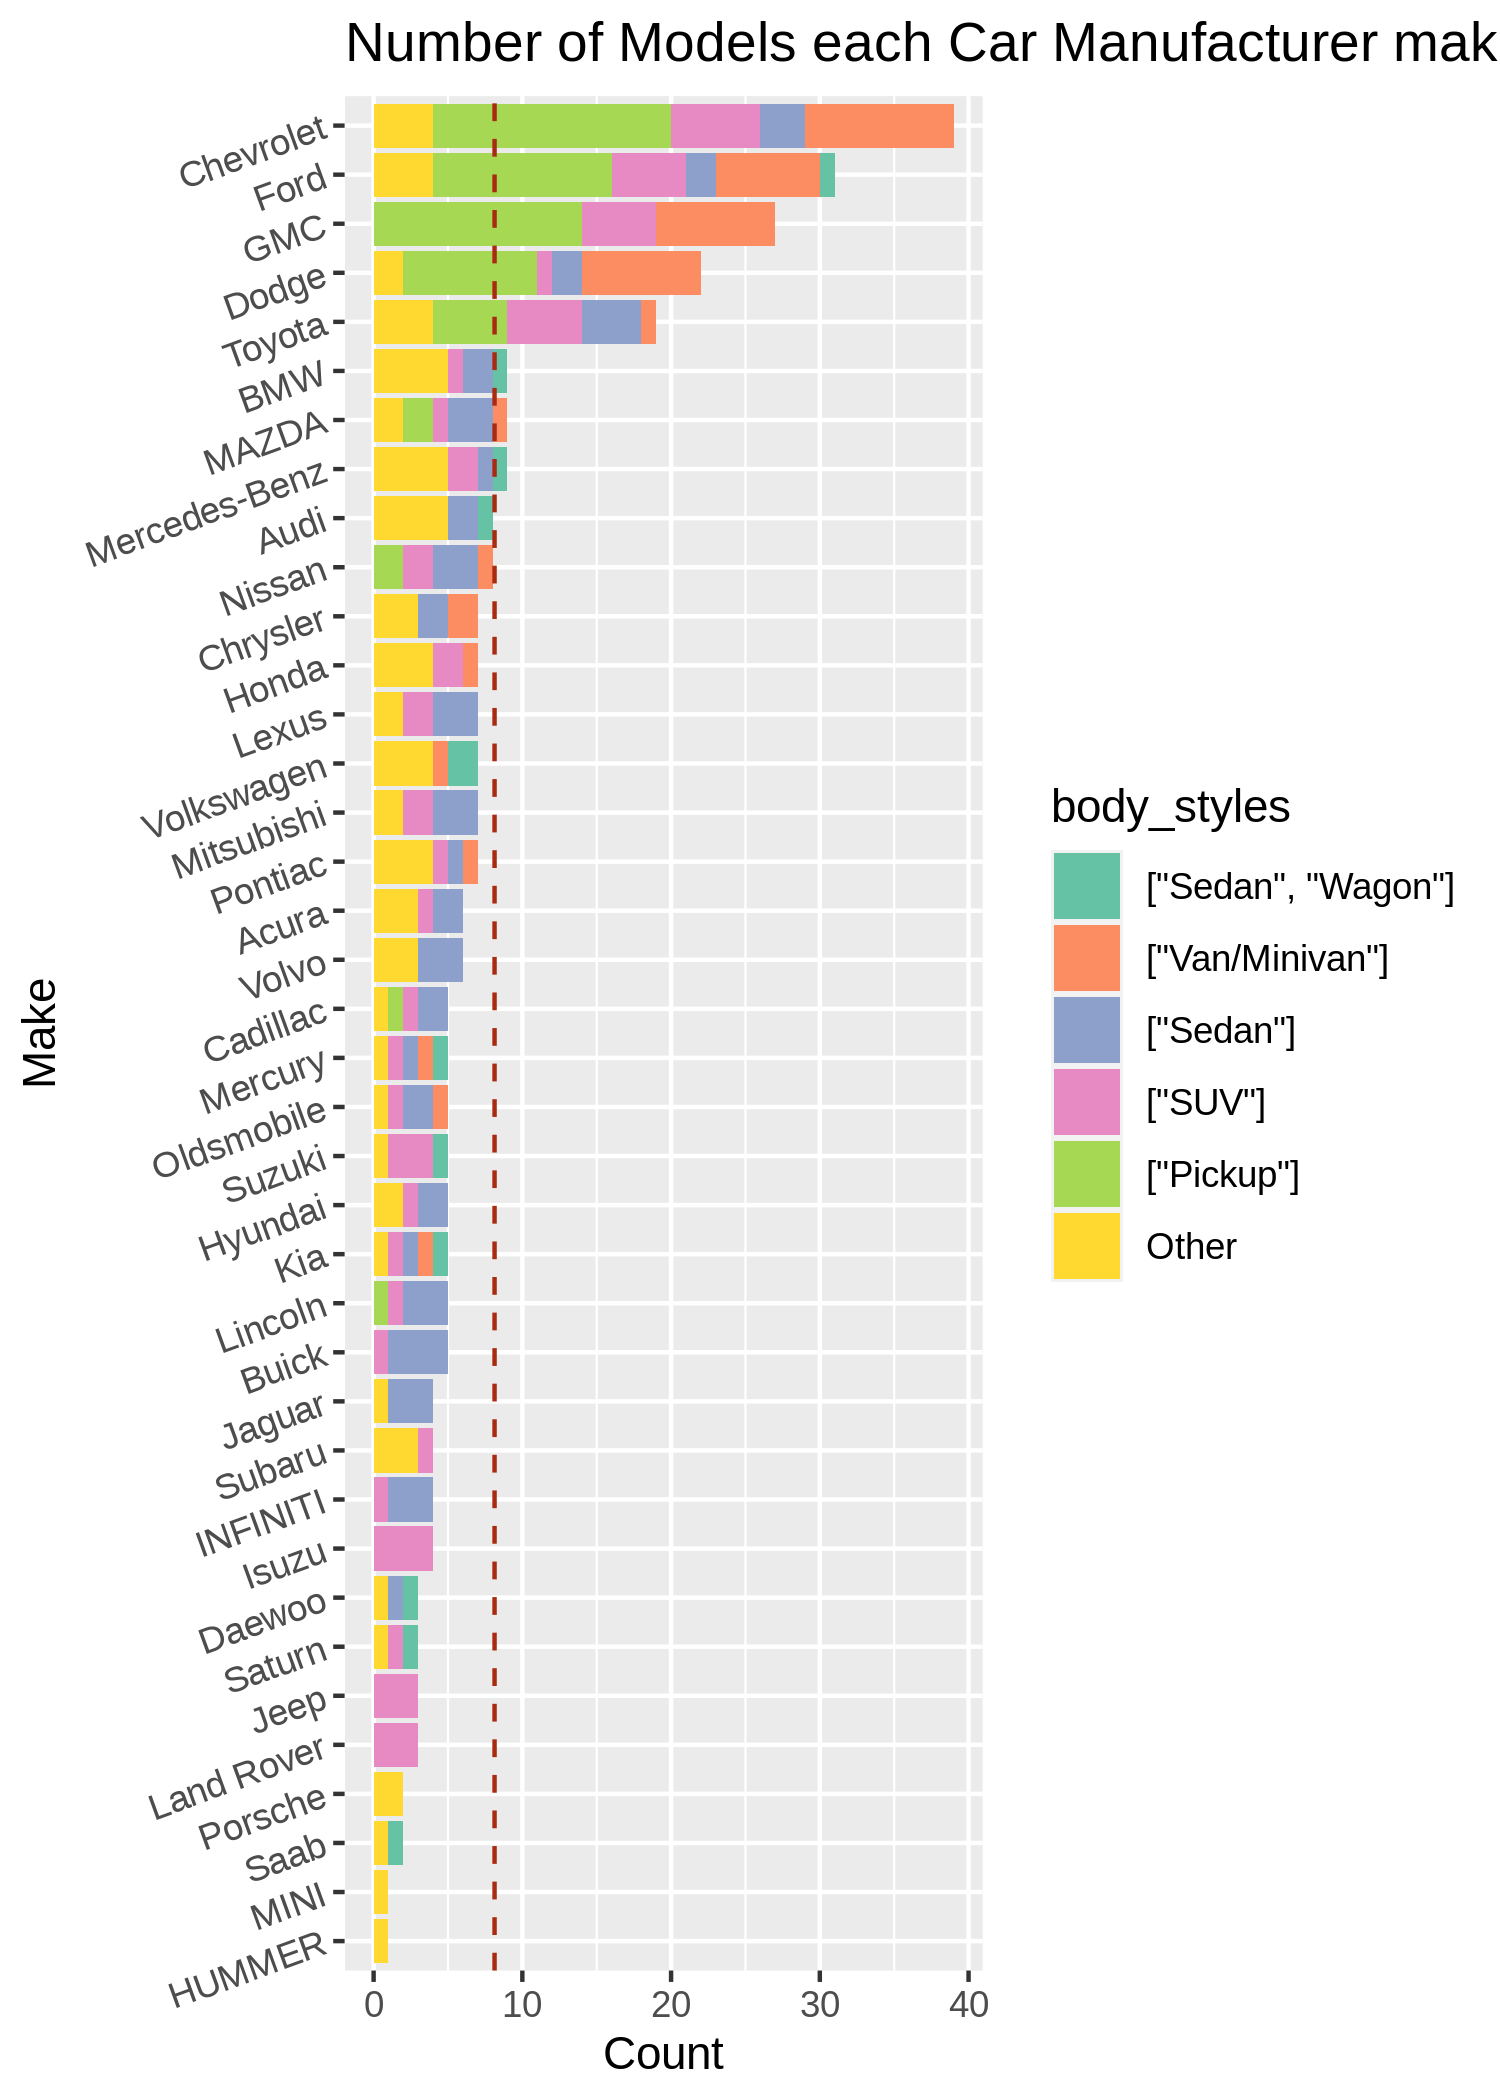

In [47]:
options(repr.plot.width=5, repr.plot.height=7)

Car2002 = Car2002 |> 
    group_by(body_styles) |>
    mutate(style_freq = n()) |>
    ungroup() |>
    arrange(desc(style_freq)) |>
    mutate(body_styles = body_styles |> fct_lump(n = 5) |> fct_inorder() |> fct_rev())

Car2002 = Car2002 |> 
    group_by(make) |>
    mutate(make_freq = n()) |>
    ungroup() |>
    arrange(desc(make_freq)) |>
    mutate(make = make |> fct_inorder() |> fct_rev())

p = ggplot(Car2002, aes(y = make, fill = body_styles)) + 
    labs(x = 'Count', y = 'Make') + 
    geom_bar() +
    geom_vline(xintercept = mean2002, color = '#a82b11', linetype = "dashed") +
    theme(axis.text.y = element_text(angle = 20, hjust = 1)) +
    scale_fill_brewer(palette = "Set2") +
    ggtitle("Number of Models each Car Manufacturer make in 2002")
p

### Number of Models for each body style

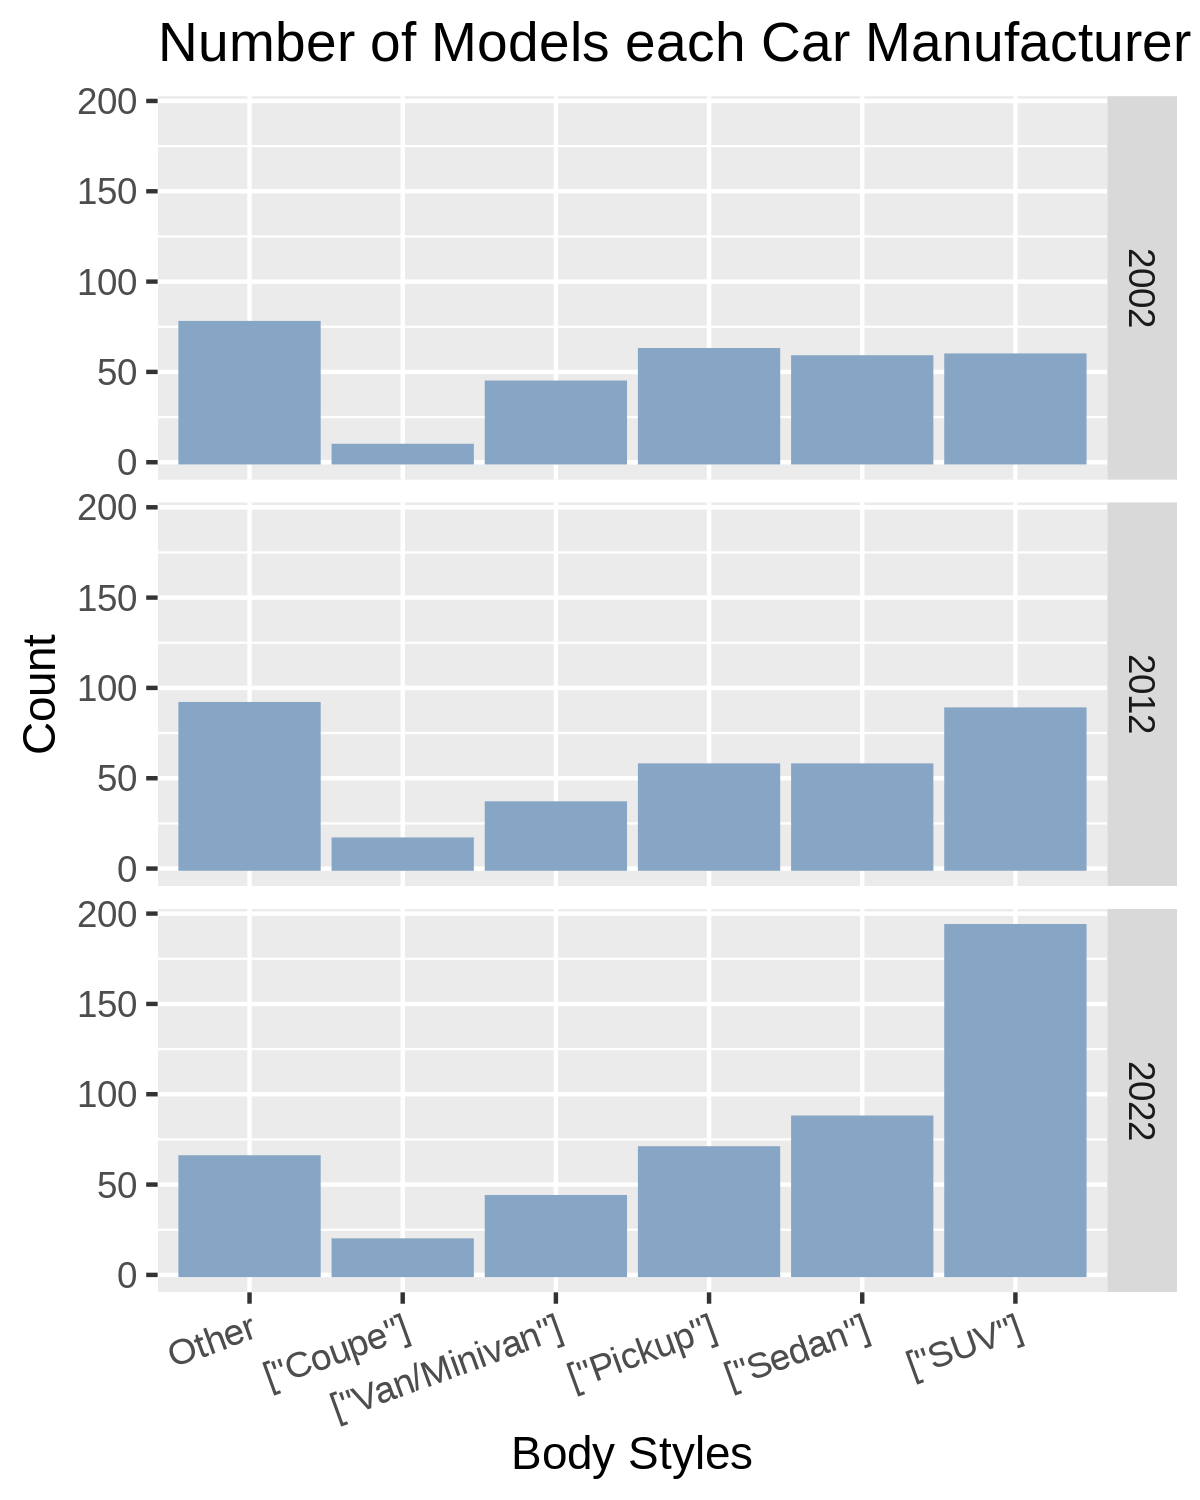

In [5]:
Car <- rbind(Car2022, Car2012, Car2002)
options(repr.plot.width=3, repr.plot.height=4)

Car = Car |> 
    group_by(body_styles) |>
    mutate(style_freq = n()) |>
    ungroup() |>
    arrange(desc(style_freq)) |>
    mutate(body_styles = body_styles |> fct_lump(n = 5) |> fct_inorder() |> fct_rev())

p = ggplot(Car, aes(x = body_styles)) + 
    labs(y = 'Count', x = 'Body Styles') + 
    geom_bar(color = '#87A5C4', fill = '#87A5C4') +
    theme(axis.text.x = element_text(angle = 20, hjust = 1)) +
    facet_wrap(~year, ncol = 1, strip.position="right") +
    ggtitle("Number of Models each Car Manufacturer make in 2002") 
p

### Number of SUV Models and Pickup Truck Models in 2022, 2012, and 2002

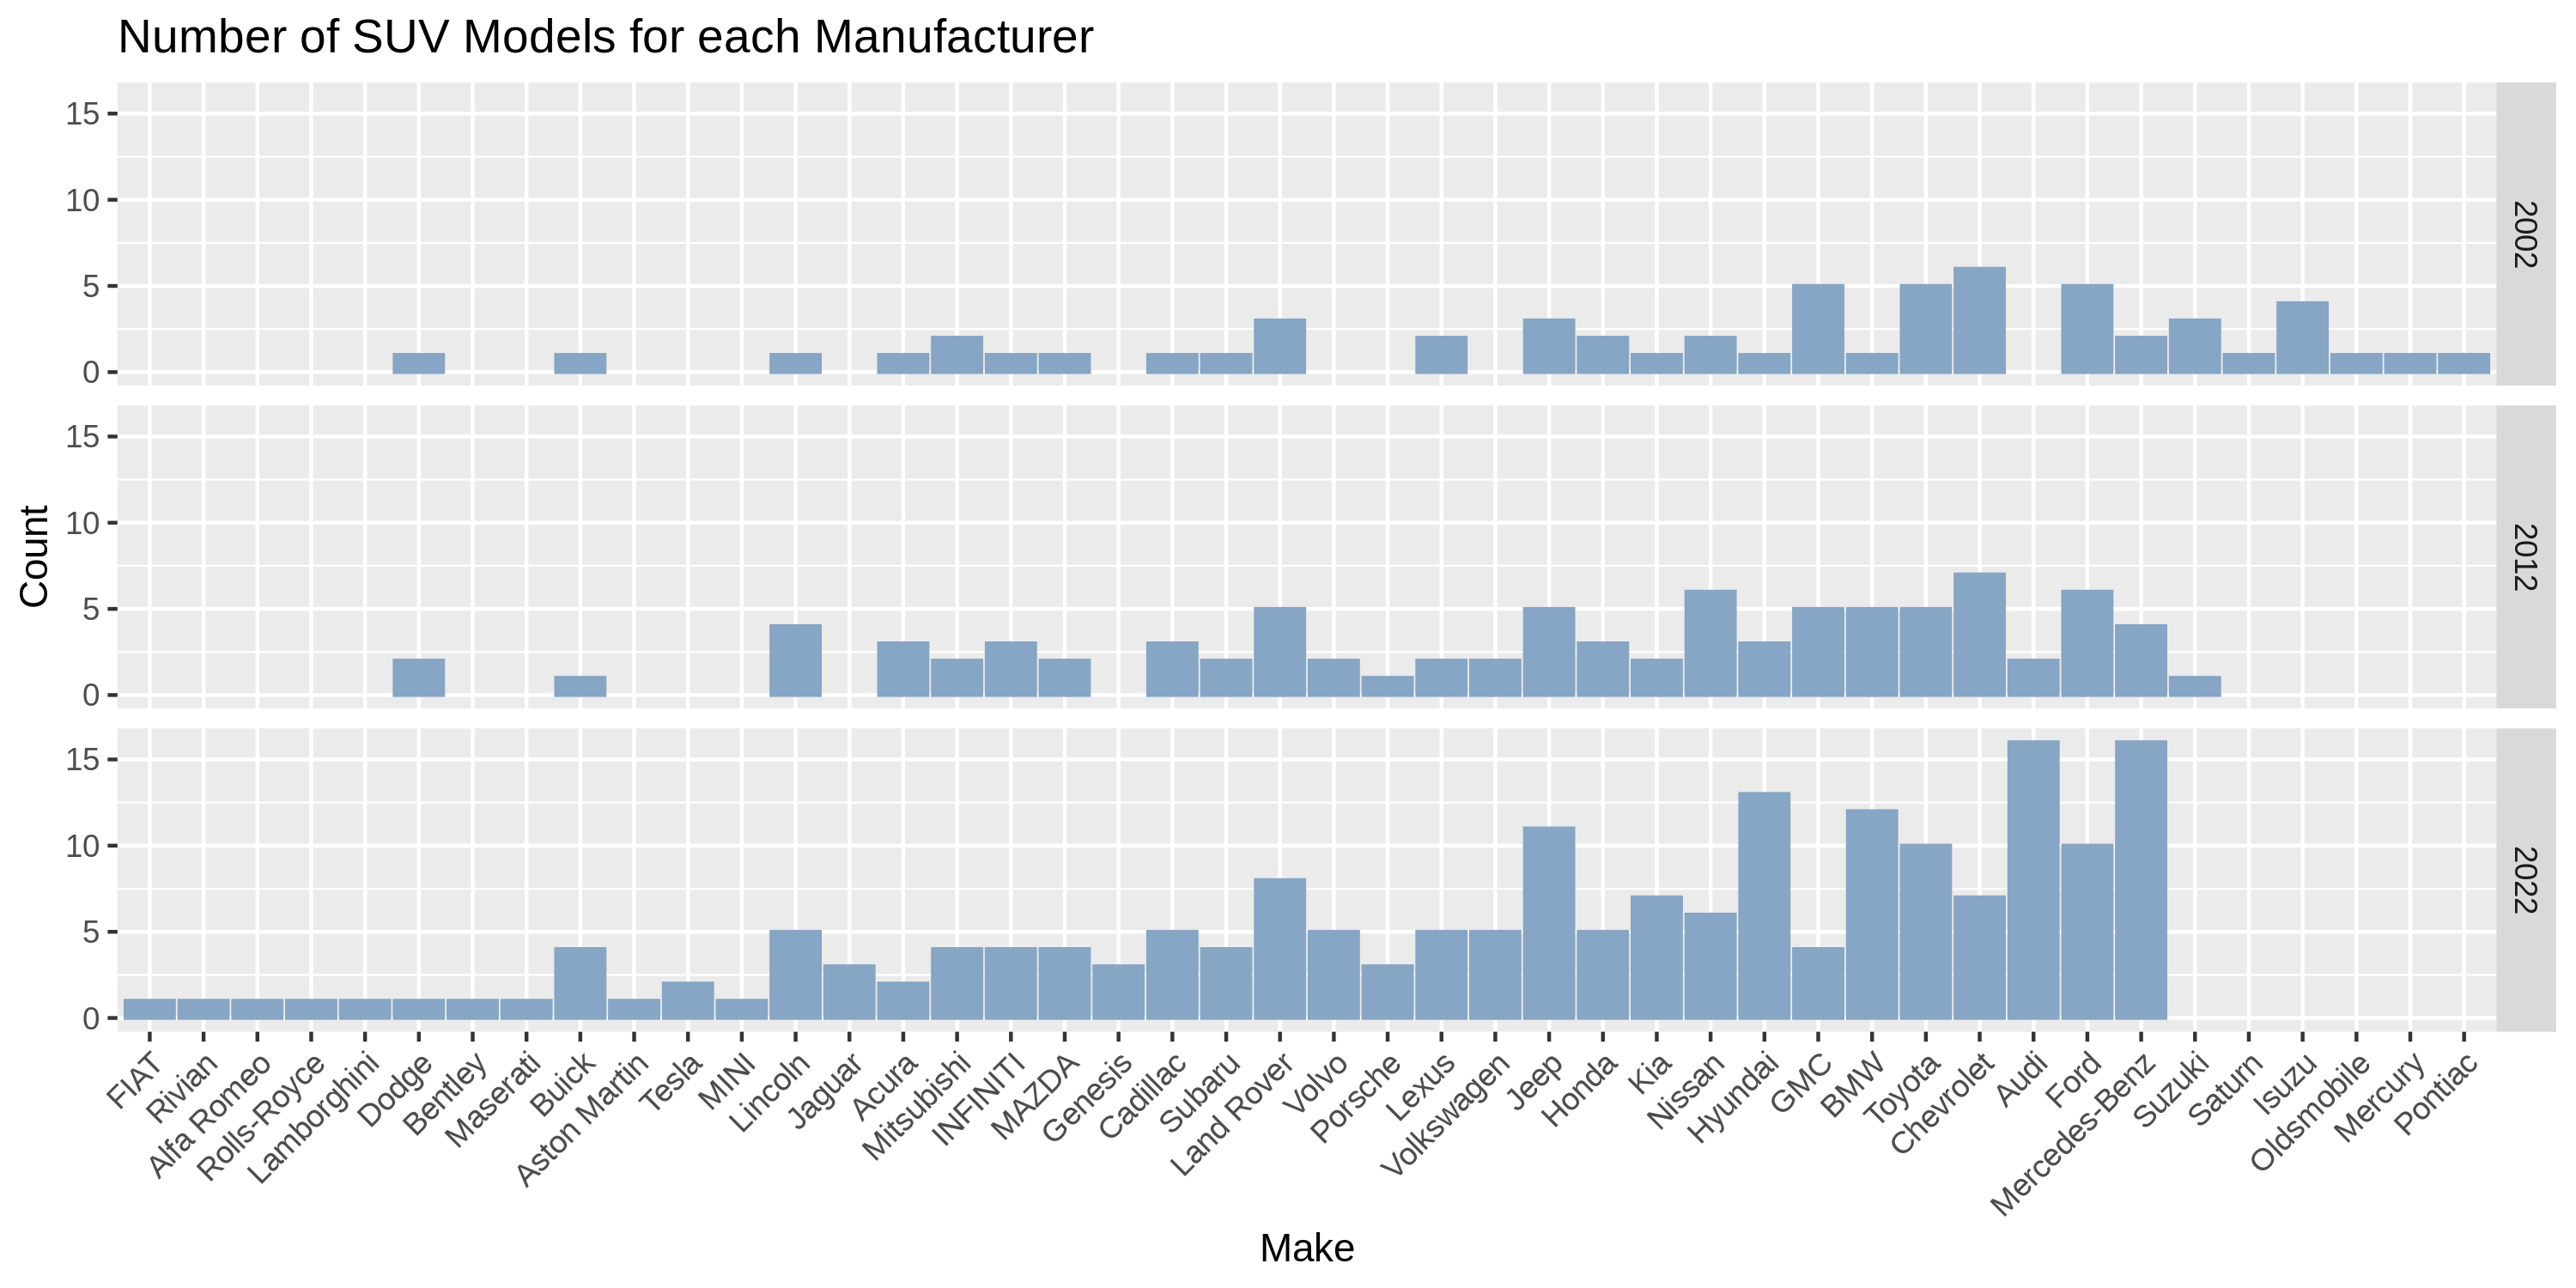

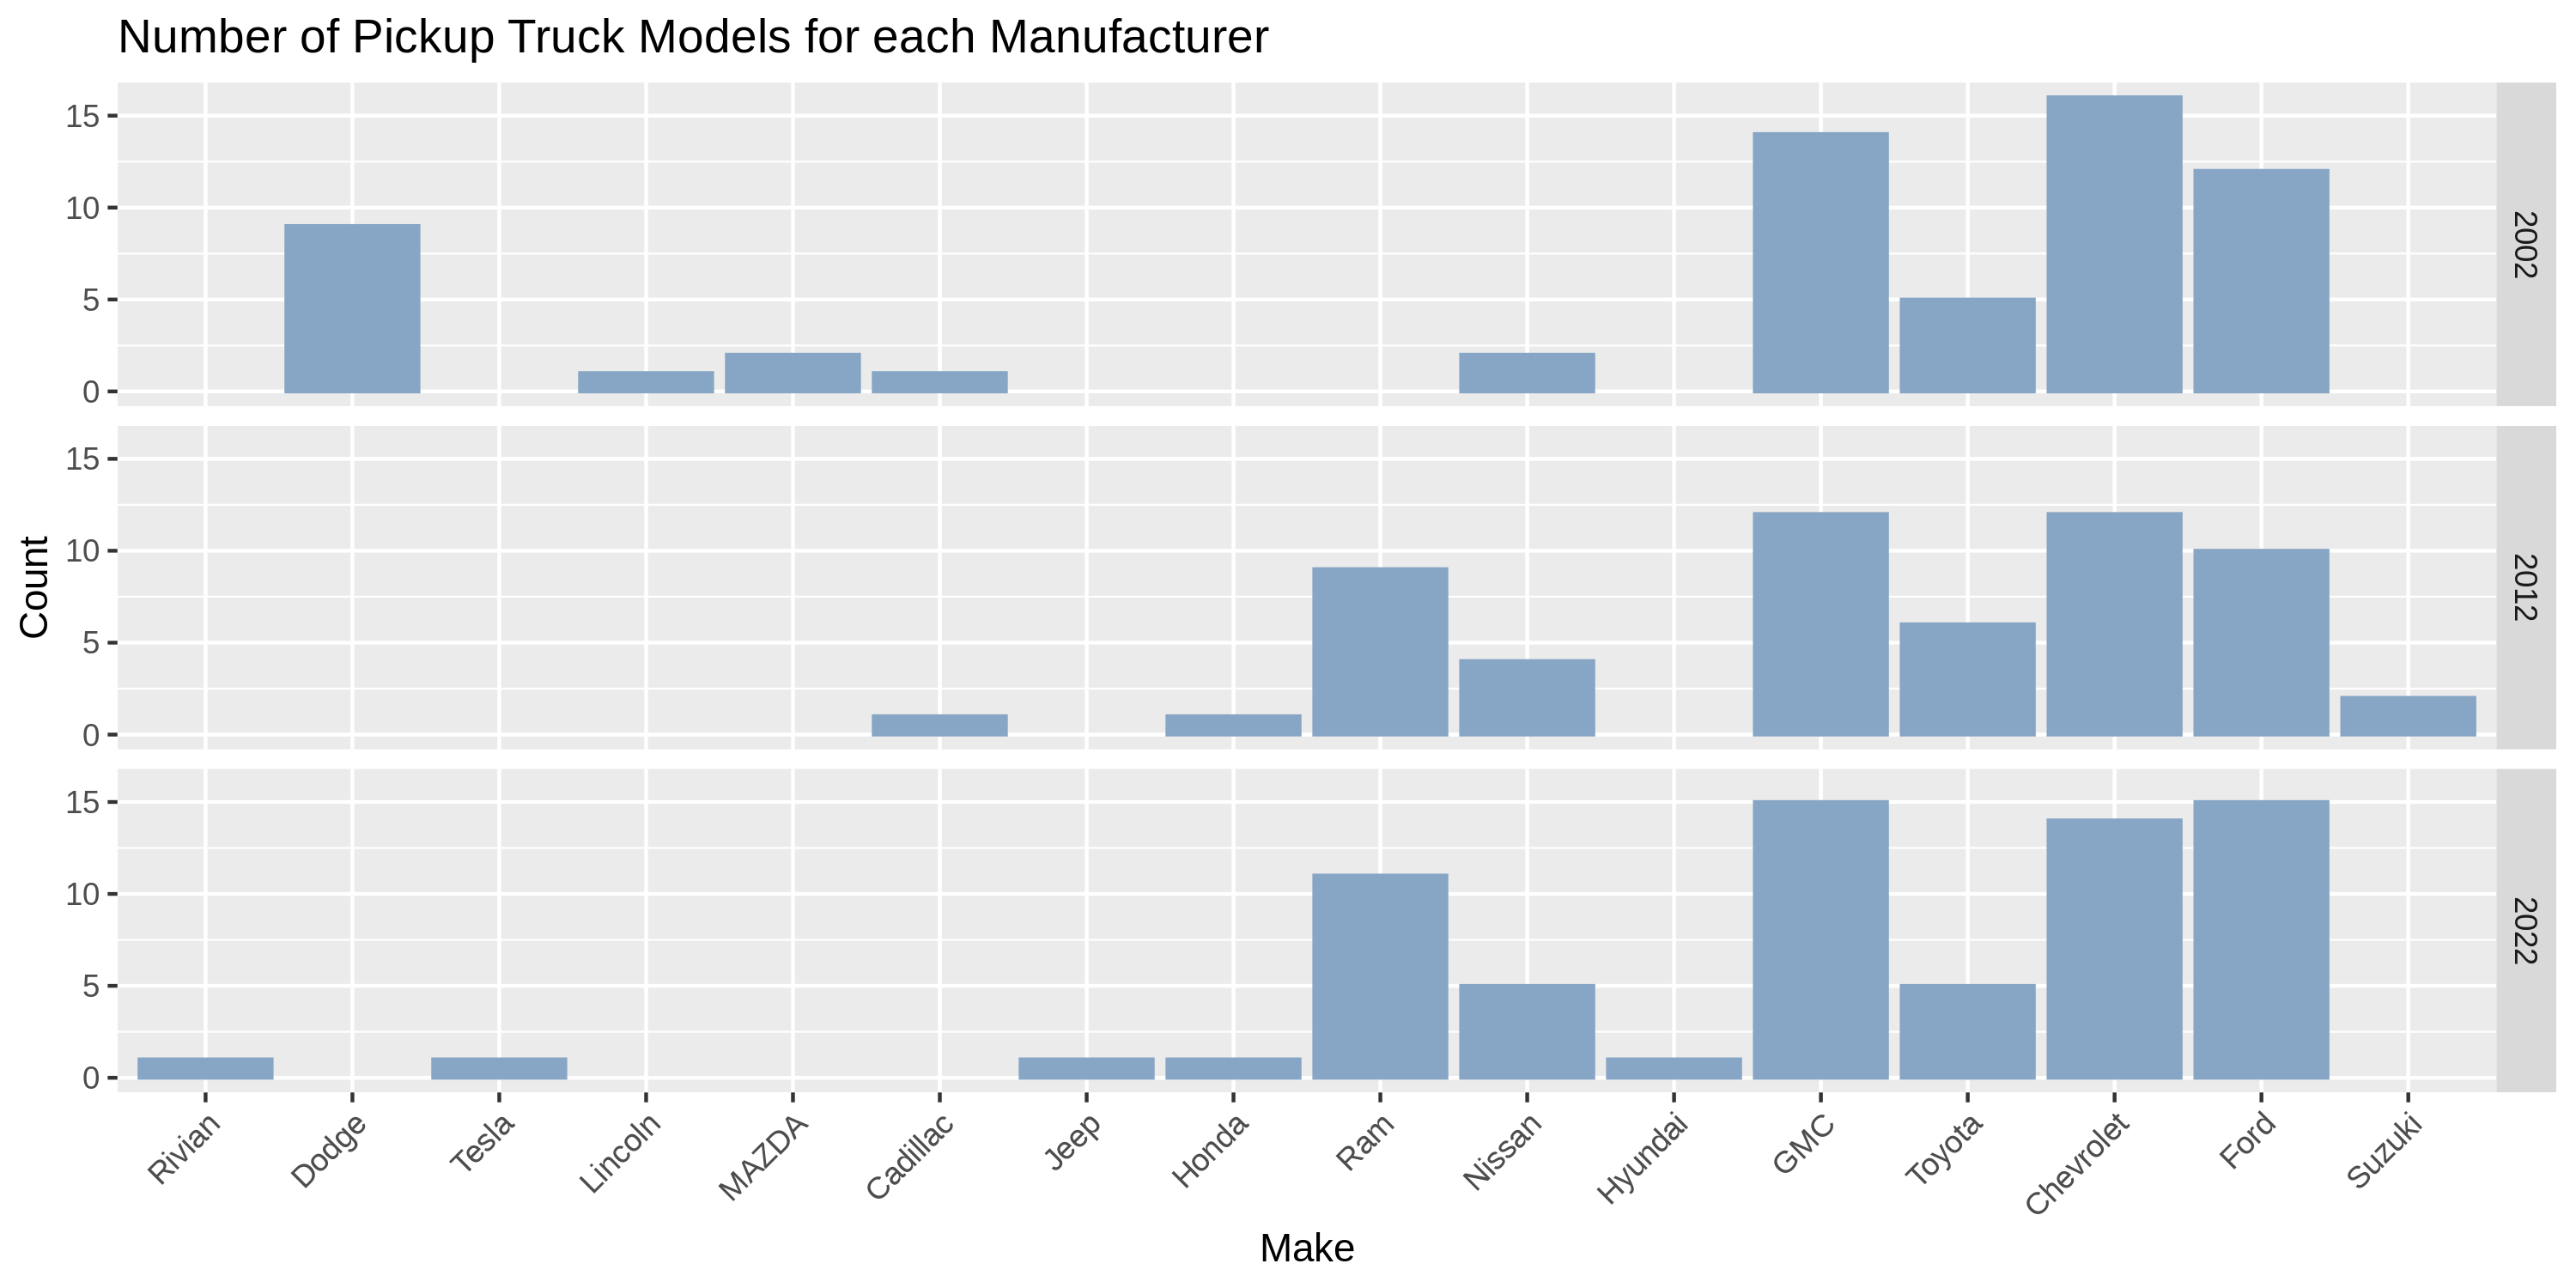

In [22]:
SUV <- Car %>% filter(body_styles == '["SUV"]')
Pickup <- Car %>% filter(body_styles == '["Pickup"]')
options(repr.plot.width=10, repr.plot.height=5)


p = ggplot(SUV, aes(x = make)) + 
    labs(y = 'Count', x = 'Make') + 
    geom_bar(color = '#87A5C4', fill = '#87A5C4') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    facet_wrap(~year, ncol = 1, strip.position="right") +
    ggtitle("Number of SUV Models for each Manufacturer") 
p

p = ggplot(Pickup, aes(x = make)) + 
    labs(y = 'Count', x = 'Make') + 
    geom_bar(color = '#87A5C4', fill = '#87A5C4') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    facet_wrap(~year, ncol = 1, strip.position="right") +
    ggtitle("Number of Pickup Truck Models for each Manufacturer") 
p

